In [80]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import random
import cufflinks
from plotly.offline import iplot
cufflinks.go_offline()
#nltk.download('stopwords')

In [81]:
df = pd.read_csv('Seattle_Hotels.csv', encoding="latin-1")
df.head()

,name,address,desc
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the..."
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat..."
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ..."
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...


In [82]:
def get_top_n_words(corpus,n=None):
    #Obtain vocabulary vector (removing stopwords, words combo from 1 to 3)
    vec = CountVectorizer(stop_words='english',ngram_range=(1,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    #get frequency of each word in the texts
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
    return words_freq[:n]

In [83]:
common_words=get_top_n_words(df['desc'],20)
common_words

[('seattle', 533),
 ('hotel', 295),
 ('center', 151),
 ('downtown', 133),
 ('free', 123),
 ('located', 108),
 ('rooms', 106),
 ('stay', 105),
 ('place', 102),
 ('airport', 99),
 ('space', 97),
 ('market', 97),
 ('enjoy', 93),
 ('pike', 90),
 ('inn', 89),
 ('business', 87),
 ('pike place', 86),
 ('place market', 85),
 ('pike place market', 85),
 ('just', 82)]

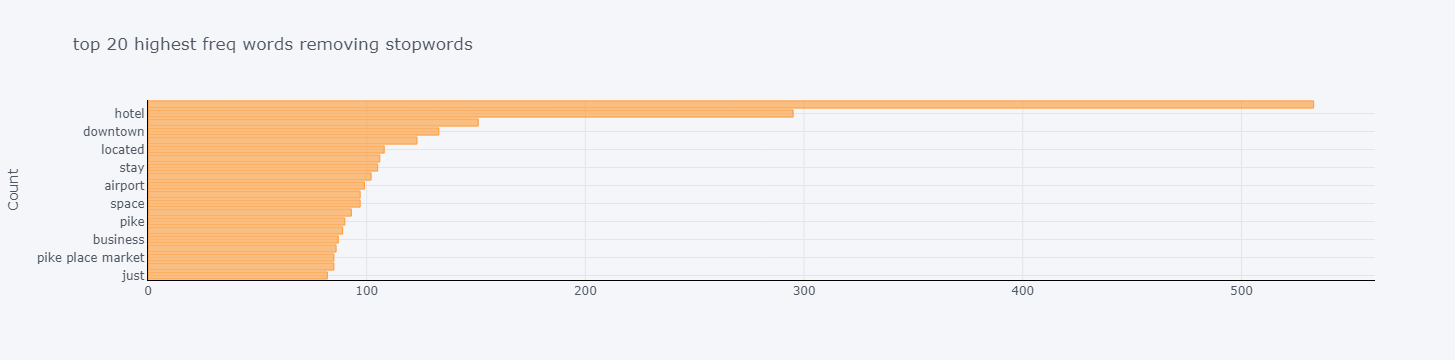

In [84]:
df1 = pd.DataFrame(common_words,columns=['desc','count'])
df1.groupby('desc').sum()['count'].sort_values().iplot(kind='barh',yTitle='Count',linecolor='black',title='top 20 highest freq words removing stopwords')

In [85]:
df['word_count']=df['desc'].apply(lambda x:len(str(x).split()))
df.head()

,name,address,desc,word_count
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the...",184
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat...",152
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ...",147
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...,150
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...,151


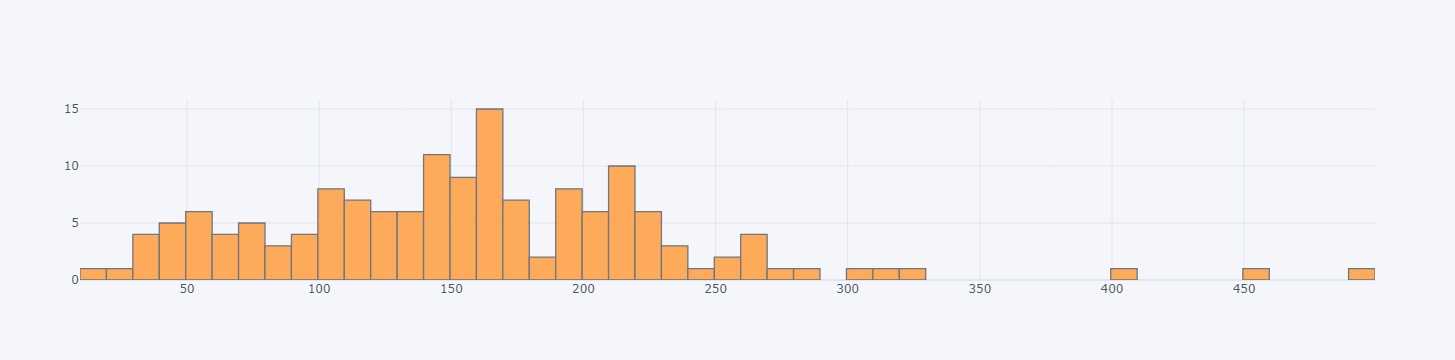

In [86]:
df['word_count'].iplot(kind='hist',bins=50)

In [87]:
#Clean texts
sub_replace = re.compile('[^0-9a-z #+_]')
customize_stopwords = set(stopwords.words('english'))
def clean_txt(text):
    text = text.lower()
    text = sub_replace.sub('',text)
    text = ' '.join(word for word in text.split() if word not in customize_stopwords)
    return text
df['desc_clean'] = df['desc'].apply(clean_txt)
df['word_count_clean']=df['desc_clean'].apply(lambda x:len(str(x).split()))
df.head()

,name,address,desc,word_count,desc_clean,word_count_clean
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the...",184,located southern tip lake union hilton garden ...,115
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat...",152,located citys vibrant core sheraton grand seat...,109
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ...",147,located heart downtown seattle awardwinning cr...,95
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...,150,whats near hotel downtown seattle location bet...,113
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...,151,situated amid incredible shopping iconic attra...,103


In [88]:
#Compute correlation
df.set_index('name',inplace = True)
tf=TfidfVectorizer(analyzer='word',ngram_range=(1,3),stop_words='english')
tfidf_matrix=tf.fit_transform(df['desc_clean'])
tfidf_matrix.shape

(152, 26893)

In [89]:
cosine_similarity =linear_kernel(tfidf_matrix,tfidf_matrix)
cosine_similarity.shape

(152, 152)

In [90]:
cosine_similarity[0]

array([1.        , 0.01153691, 0.02685919, 0.00792023, 0.03015153,
       0.01219004, 0.01892131, 0.01309173, 0.00748361, 0.01937892,
       0.01370375, 0.00893505, 0.01394245, 0.00571003, 0.00651706,
       0.01680824, 0.01145732, 0.03489329, 0.00864453, 0.02317099,
       0.02879236, 0.00918459, 0.00786437, 0.01590655, 0.01478097,
       0.02406842, 0.02906451, 0.00498255, 0.02507499, 0.02009584,
       0.01528377, 0.02923925, 0.01633125, 0.02207616, 0.03437377,
       0.02755743, 0.00682674, 0.01171681, 0.03198261, 0.0325218 ,
       0.01770666, 0.01065604, 0.01341233, 0.0263306 , 0.04676751,
       0.01105609, 0.03165515, 0.01330748, 0.03209152, 0.01390424,
       0.02306914, 0.01856613, 0.03500288, 0.01346065, 0.0262624 ,
       0.01354738, 0.02347969, 0.0299341 , 0.01149806, 0.02492042,
       0.02196264, 0.0102064 , 0.03992267, 0.02891626, 0.02471638,
       0.01229548, 0.02836503, 0.01141957, 0.0168332 , 0.00715974,
       0.02012722, 0.01653828, 0.02307208, 0.02203282, 0.02347

In [104]:
indices = pd.Series(df.index)
indices[:5]

0    Hilton Garden Seattle Downtown
1            Sheraton Grand Seattle
2     Crowne Plaza Seattle Downtown
3     Kimpton Hotel Monaco Seattle 
4                The Westin Seattle
Name: name, dtype: object

In [105]:
def recommendations(name,cosine_similarity):
    recommended_hotels = []
    idx = indices[indices == name].index[0]
    score_series = pd.Series(cosine_similarity[idx]).sort_values(ascending=False)
    top_10_indexes = list(score_series[1:11].index)
    for i in top_10_indexes:
        recommended_hotels.append(list(df.index)[i])
    return recommended_hotels

In [106]:
recommendations('Hilton Garden Seattle Downtown',cosine_similarity)

['Staybridge Suites Seattle Downtown - Lake Union',
 'Silver Cloud Inn - Seattle Lake Union',
 'Residence Inn by Marriott Seattle Downtown/Lake Union',
 'The Arctic Club Seattle - a DoubleTree by Hilton Hotel',
 'The Loyal Inn',
 'MarQueen Hotel',
 'Embassy Suites by Hilton Seattle Tacoma International Airport',
 'EVEN Hotel Seattle - South Lake Union',
 'Homewood Suites by Hilton Seattle Downtown',
 'Silver Cloud Hotel - Seattle Broadway']